## Assignment2 - Supervised Learning flow

### Part 1 - Student details:
* Please write the First Name and last 4 digits of the i.d. for each student. For example:
<pre>Israel 9812</pre>

In [12]:
# student 1: Matan 5265
# student 2: Kfir 4872
# student 3: Koren 0157
# student 4: 
# (optional) student 5:
# (optional) student 6:

## Part 2 - Experiments
You could add as many code cells as needed

In [2]:
# Moduls loading
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import f1_score, make_scorer
from sklearn.model_selection import learning_curve
from sklearn.model_selection import GridSearchCV, StratifiedKFold

In [3]:
# Data sets loading
df_test = pd.read_csv('wine_test.csv')
df_train = pd.read_csv('wine_train.csv')

In [4]:
# 5 first rows of test set
df_test.head()

alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0    13.78        2.76  2.30               22.0       90.0           1.35   
1    14.02        1.68  2.21               16.0       96.0           2.65   
2    13.17        5.19  2.32               22.0       93.0           1.74   
3    11.03        1.51  2.20               21.5       85.0           2.46   
4    13.40        3.91  2.48               23.0      102.0           1.80   

   flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity   hue  \
0        0.68                  0.41             1.03             9.58  0.70   
1        2.33                  0.26             1.98             4.70  1.04   
2        0.63                  0.61             1.55             7.90  0.60   
3        2.17                  0.52             2.01             1.90  1.71   
4        0.75                  0.43             1.41             7.30  0.70   

   od280/od315_of_diluted_wines  proline  target  
0                          1.68    615.0       2  
1                          3.59   1035.0       0  
2                          1.48    725.0       2  
3                          2.87    407.0       1  
4                          1.56    750.0       2

In [5]:
# 5 first rows of train set
df_train.head()

alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0    12.08        1.83  2.32               18.5       81.0           1.60   
1    13.58        2.58  2.69               24.5      105.0           1.55   
2    12.37        0.94  1.36               10.6       88.0           1.98   
3    11.82        1.72  1.88               19.5       86.0           2.50   
4    13.16        3.57  2.15               21.0      102.0           1.50   

   flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity   hue  \
0        1.50                  0.52             1.64             2.40  1.08   
1        0.84                  0.39             1.54             8.66  0.74   
2        0.57                  0.28             0.42             1.95  1.05   
3        1.64                  0.37             1.42             2.06  0.94   
4        0.55                  0.43             1.30             4.00  0.60   

   od280/od315_of_diluted_wines  proline  target  
0                          2.27    480.0       1  
1                          1.80    750.0       2  
2                          1.82    520.0       1  
3                          2.44    415.0       1  
4                          1.68    830.0       2

In [6]:
X_train = df_train.drop(columns=['target'])
y_train = df_train['target']
X_test = df_test.drop(columns=['target'])
y_test = df_test['target']

In [7]:
# statistical measures 
print(df_train.describe().to_string())


          alcohol  malic_acid         ash  alcalinity_of_ash   magnesium  total_phenols  flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity         hue  od280/od315_of_diluted_wines      proline      target
count  142.000000  142.000000  142.000000         142.000000  142.000000     142.000000  142.000000            142.000000       142.000000       142.000000  142.000000                    142.000000   142.000000  142.000000
mean    12.997254    2.297746    2.361690          19.419718   99.943662       2.315986    2.063592              0.346690         1.561901         5.030211    0.958563                      2.638873   742.457746    0.922535
std      0.789931    1.093317    0.283231           3.354815   13.683751       0.639469    1.005302              0.117562         0.540979         2.239593    0.219631                      0.718083   317.250905    0.772524
min     11.410000    0.740000    1.360000          10.600000   78.000000       0.980000    0.340000         

In [8]:
# statistical measures 
print(df_train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142 entries, 0 to 141
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       142 non-null    float64
 1   malic_acid                    142 non-null    float64
 2   ash                           142 non-null    float64
 3   alcalinity_of_ash             142 non-null    float64
 4   magnesium                     142 non-null    float64
 5   total_phenols                 142 non-null    float64
 6   flavanoids                    142 non-null    float64
 7   nonflavanoid_phenols          142 non-null    float64
 8   proanthocyanins               142 non-null    float64
 9   color_intensity               142 non-null    float64
 10  hue                           142 non-null    float64
 11  od280/od315_of_diluted_wines  142 non-null    float64
 12  proline                       142 non-null    float64
 13  targe

In [10]:
# Check for duplicate rows in the train dataset

print("duplicate rows in train dataset")
print(X_train.duplicated().sum())

print("\nduplicate rows in test dataset")
print(X_test.duplicated().sum())

duplicate rows in train dataset
0

duplicate rows in test dataset
0


count values
48 57 37


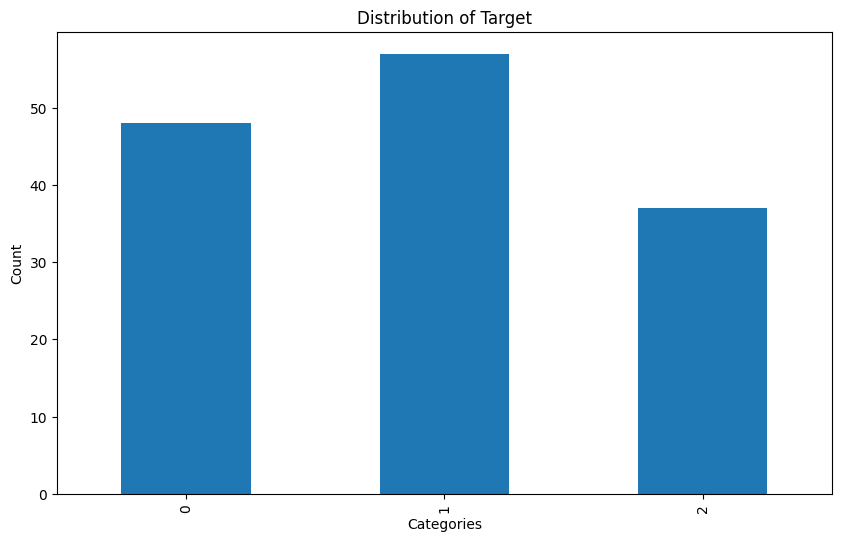

In [46]:
# target distrebution 
count_values = df_train['target'].value_counts().sort_index()
count_values.plot(kind='bar', figsize=(10, 6))
plt.title('Distribution of Target')
plt.xlabel('Categories')
plt.ylabel('Count')

print("count values")
print(count_values[0], count_values[1], count_values[2])

<Axes: >

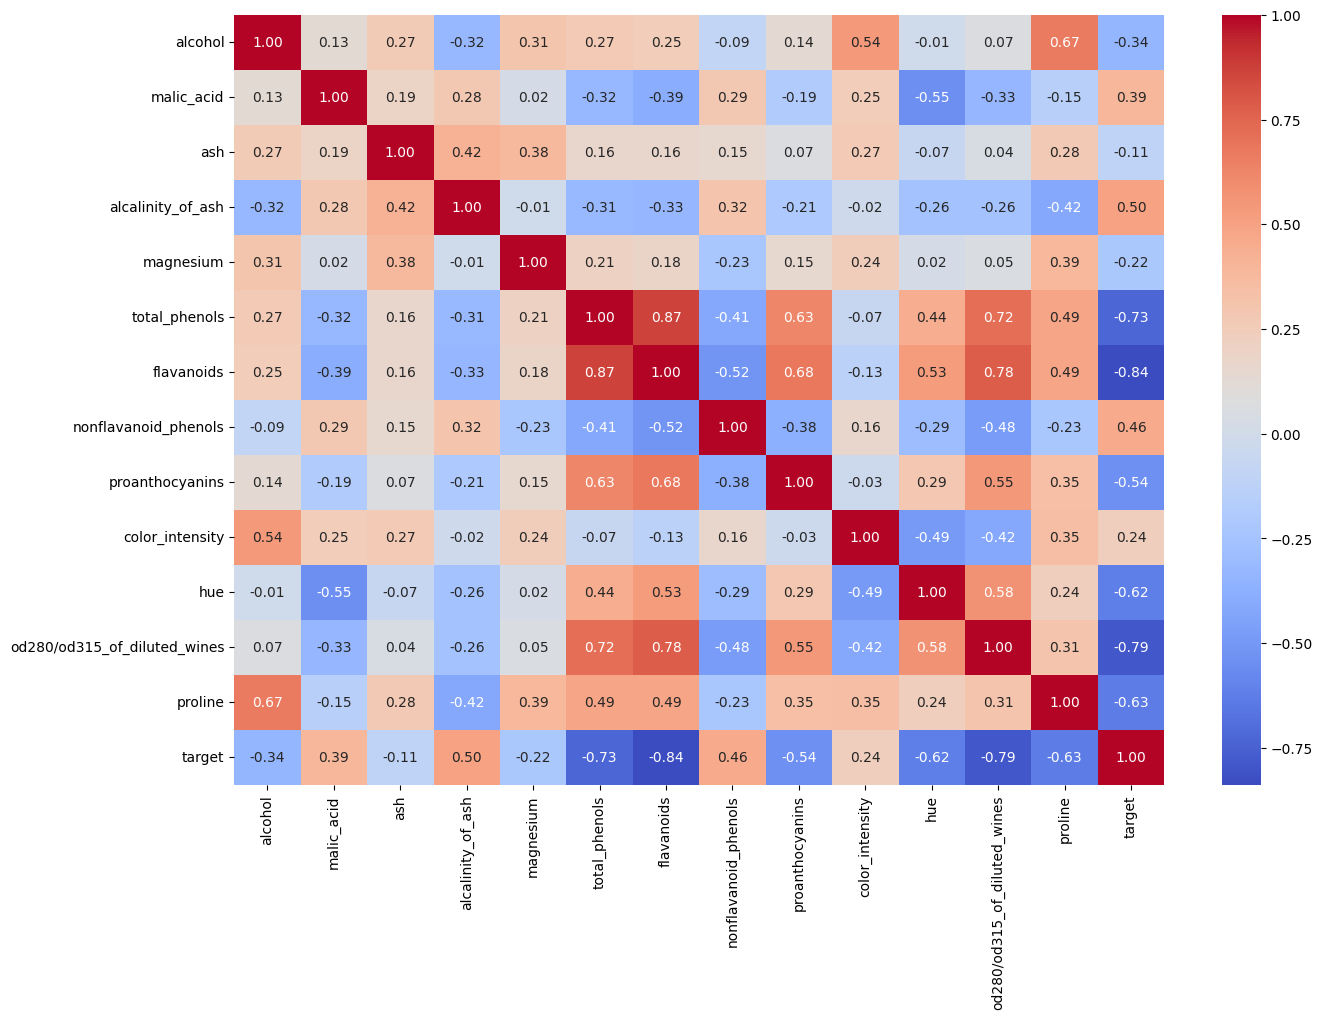

In [47]:
# Pearson correlation
plt.figure(figsize=(15, 10))
corr_Matrix = df_train.corr(method='pearson')   # create correlation matrix
sns.heatmap(corr_Matrix, annot=True, fmt='.2f', cmap='coolwarm')   # create a heat map plot

# print(corr_Matrix.to_string())

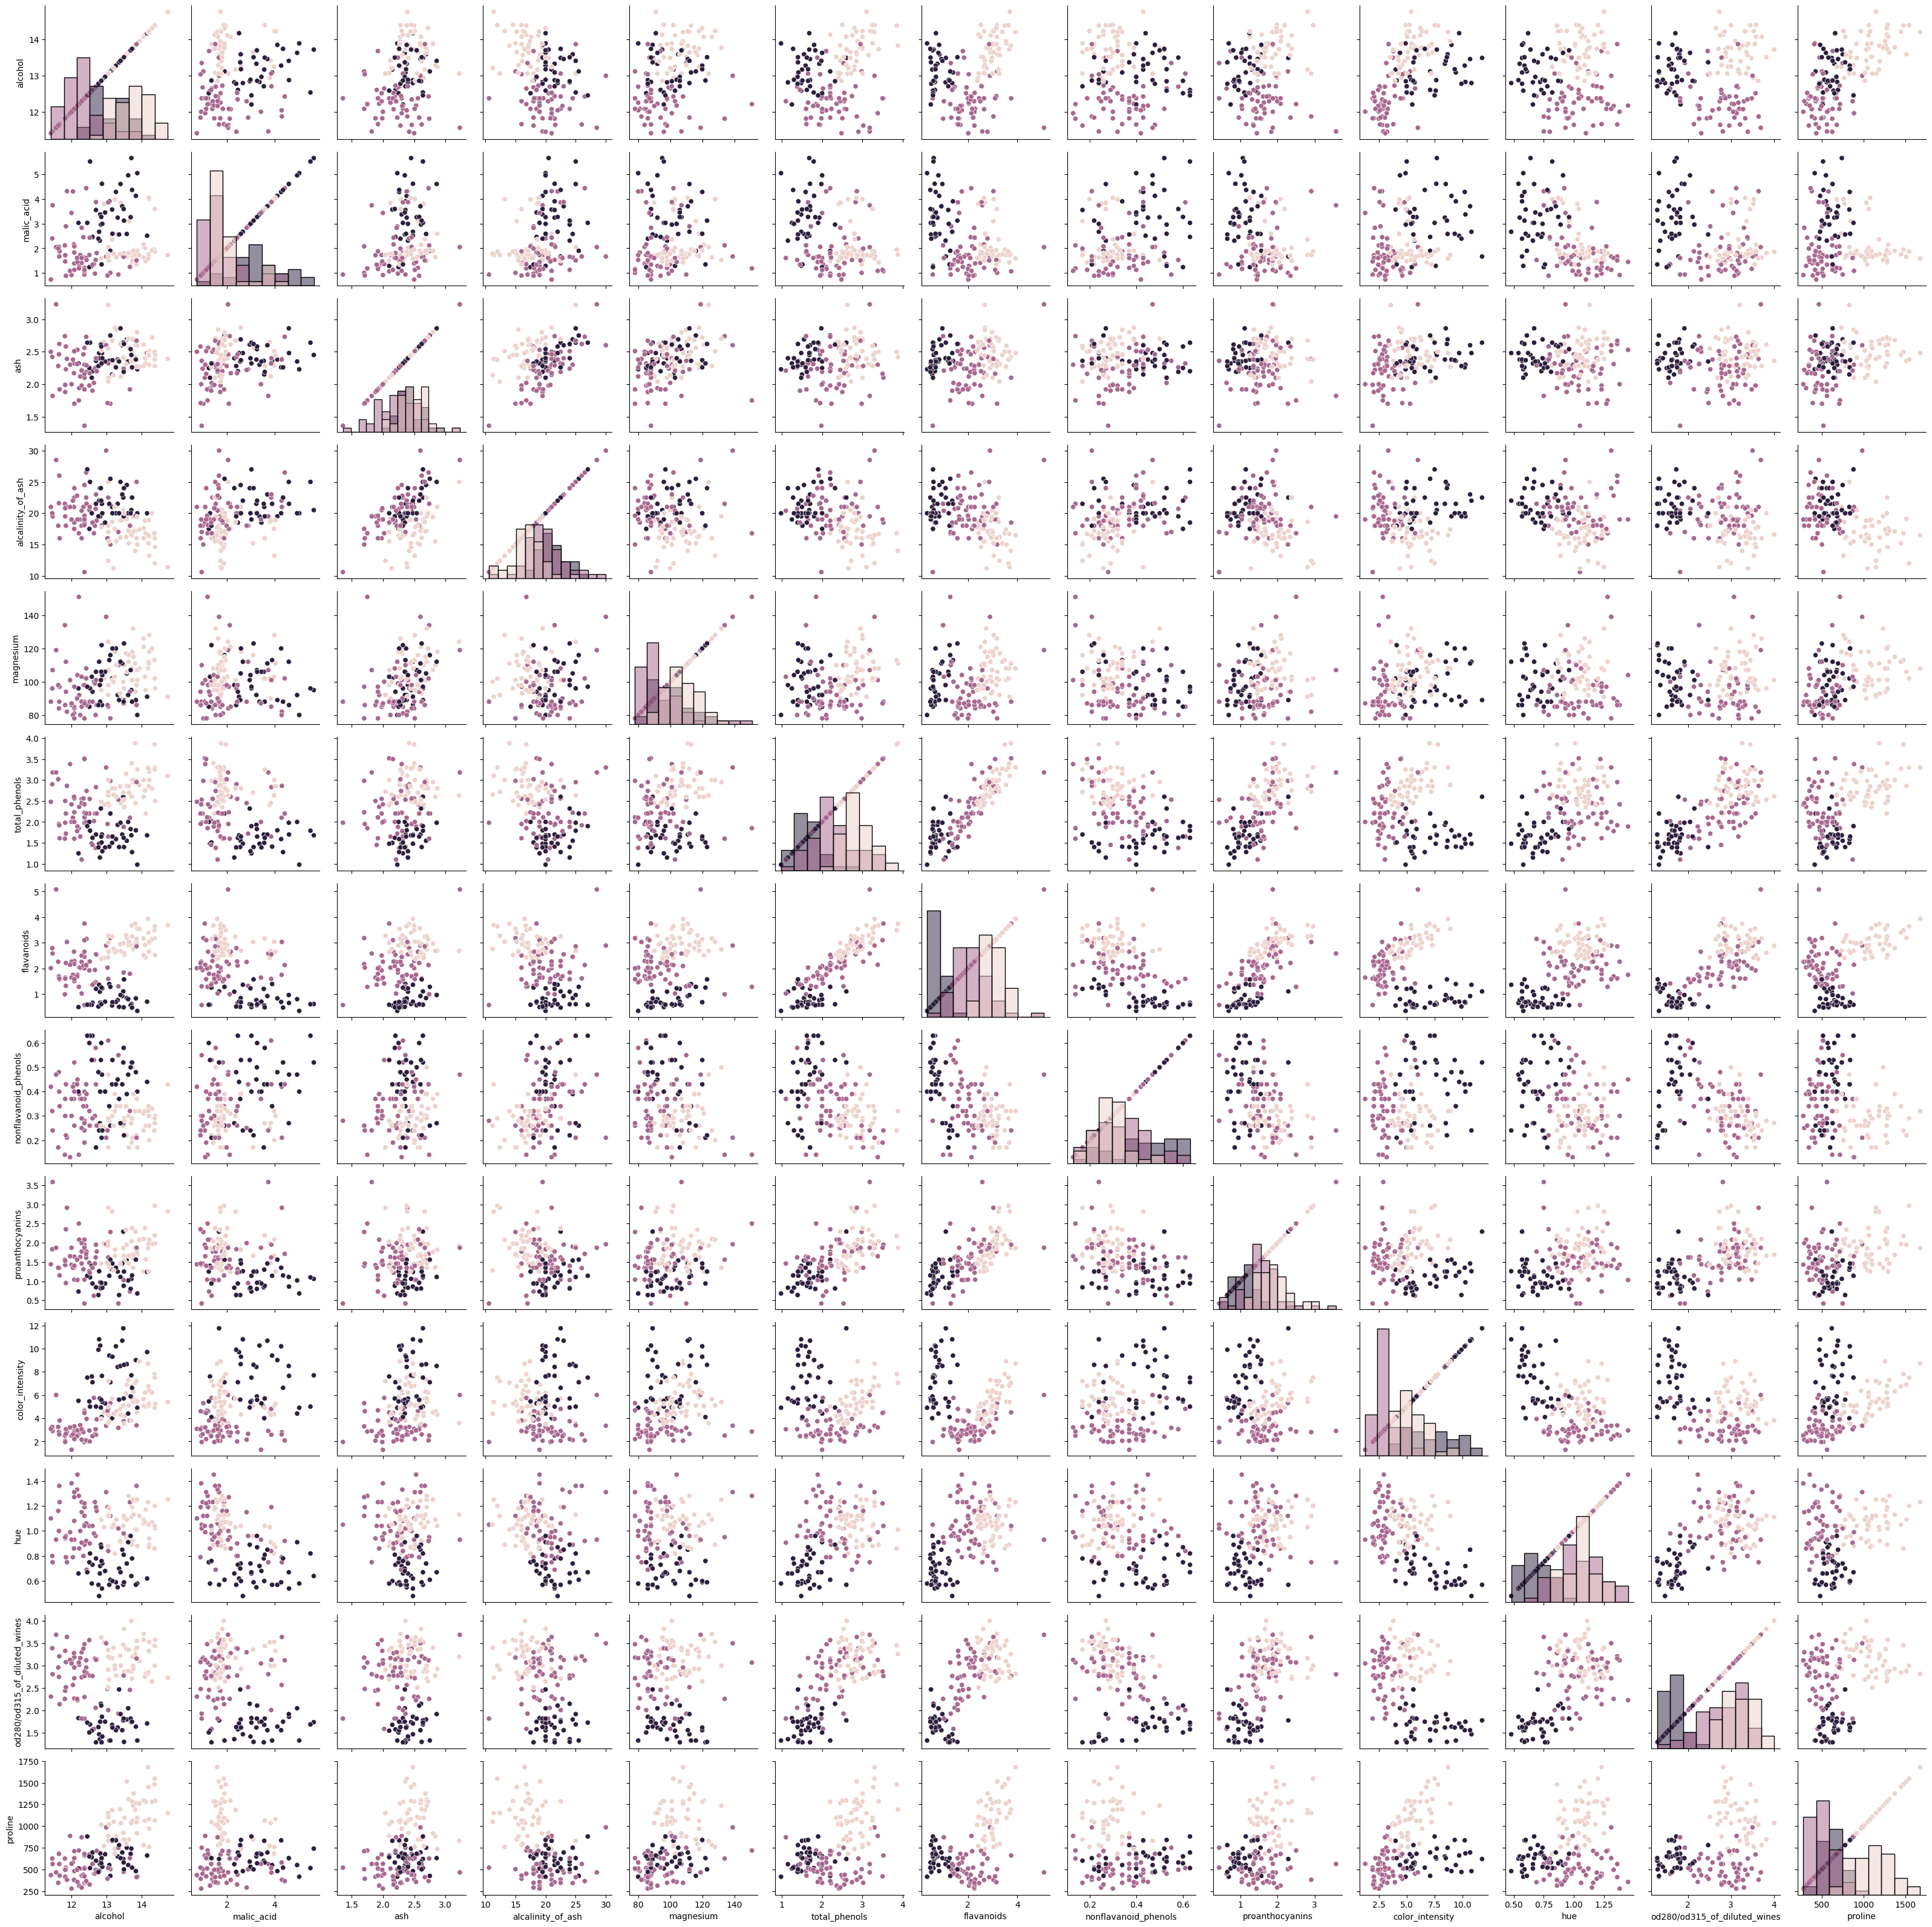

In [11]:
# create a grid scatter plot 

grid = sns.PairGrid(df_train, hue='target')
grid.map(sns.scatterplot)  # Default scatter plot
grid.map_diag(sns.histplot)  # Diagonal plots as histograms


## Part 3 - Training flow
Use the best combination of feature engineering, model (algorithm and hyperparameters) from the experiment part (part 2)

In [15]:
# scaling the values in range (0, 1)
scaler = StandardScaler()
# train data set
scaler.fit(X_train) # Fit the scaler to the DataFrame
scaled_df = scaler.transform(X_train)   # Transform the data
X_train_standard = pd.DataFrame(scaled_df, columns=X_train.columns)  # Convert to DataFrame


# test data set
scaler.fit(X_test) # Fit the scaler to the DataFrame
scaled_df = scaler.transform(X_test)   # Transform the data
X_test_standard = pd.DataFrame(scaled_df, columns=X_test.columns)  # Convert to DataFrame

In [ ]:
print(X_train_standard.describe().to_string())
print(X_train.describe().to_string())

In [16]:
# Create a MinMaxScaler object
scaler = MinMaxScaler()

# train data set
scaled_data = scaler.fit_transform(X_train)
X_train_minMax = pd.DataFrame(scaled_data, columns=X_train.columns)

# test data set
scaled_data = scaler.fit_transform(X_test)
X_test_minMax = pd.DataFrame(scaled_data, columns=X_train.columns)

In [18]:
# Define the classifiers and their hyperparameters
classifiers = {
    'Decision Tree -StandardScaler': DecisionTreeClassifier(),
    'K-Nearest Neighbors -StandardScaler': KNeighborsClassifier(),
    'Naive Bayes -StandardScaler': GaussianNB(),
    'Decision Tree -MinMaxScaler': DecisionTreeClassifier(),
    'K-Nearest Neighbors -MinMaxScaler': KNeighborsClassifier(),
    'Naive Bayes -MinMaxScaler': GaussianNB(),
}

# Define hyperparameters for each classifier
param_grids = {
    'Decision Tree -StandardScaler': {'max_depth': [None, 10, 20, 30], 'min_samples_split': [2, 10, 20]},
    'K-Nearest Neighbors -StandardScaler': {'n_neighbors': [3, 5, 7, 9, 11, 13], 'weights': ['uniform', 'distance'], 'metric': ['euclidean', 'manhattan']},
    'Naive Bayes -StandardScaler': {},  # Naive Bayes has no hyperparameters to tune
    'Decision Tree -MinMaxScaler': {'max_depth': [None, 10, 20, 30], 'min_samples_split': [2, 10, 20]},
    'K-Nearest Neighbors -MinMaxScaler': {'n_neighbors': [3, 5, 7, 9, 11, 13], 'weights': ['uniform', 'distance'], 'metric': ['euclidean', 'manhattan']},
    'Naive Bayes -MinMaxScaler': {},
}

In [19]:
best_estimators = {}
best_scores = {}
scorer = make_scorer(f1_score, average='macro')
# Define the cross-validator with a fixed random_state
#cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Perform Grid Search with Cross-Validation for each classifier
i = 0
X_train = X_train_minMax
for name, clf in classifiers.items():
    if i <= 2:
        X_train = X_train_standard
    i += 1
    #print(f"Running Grid Search for {name}...")
    grid_search = GridSearchCV(clf, param_grids[name], cv=5, scoring=scorer)
    grid_search.fit(X_train, y_train)
    best_estimators[name] = grid_search.best_params_
    best_scores[name] = grid_search.best_score_


# Display the best scores and the corresponding estimators
for name in best_scores:
    print(f"Best score for {name}: {best_scores[name]:.4f} with parameters {best_estimators[name]}")


Best score for Decision Tree -StandardScaler: 0.8852 with parameters {'max_depth': 30, 'min_samples_split': 10}
Best score for K-Nearest Neighbors -StandardScaler: 0.9790 with parameters {'metric': 'manhattan', 'n_neighbors': 9, 'weights': 'uniform'}
Best score for Naive Bayes -StandardScaler: 0.9655 with parameters {}
Best score for Decision Tree -MinMaxScaler: 0.8924 with parameters {'max_depth': None, 'min_samples_split': 10}
Best score for K-Nearest Neighbors -MinMaxScaler: 0.9790 with parameters {'metric': 'manhattan', 'n_neighbors': 9, 'weights': 'uniform'}
Best score for Naive Bayes -MinMaxScaler: 0.9655 with parameters {}


In [20]:
# Turn dictionary into data frame 
df_f1_score = pd.DataFrame(best_scores.items(), columns=['Algorithm', 'F1 Score']).sort_values('F1 Score')
max_f1_score_row = df_f1_score.loc[df_f1_score['F1 Score'].idxmax()]
print(df_f1_score)

                             Algorithm  F1 Score
0        Decision Tree -StandardScaler  0.885208
3          Decision Tree -MinMaxScaler  0.892399
2          Naive Bayes -StandardScaler  0.965529
5            Naive Bayes -MinMaxScaler  0.965529
1  K-Nearest Neighbors -StandardScaler  0.978968
4    K-Nearest Neighbors -MinMaxScaler  0.978968


In [21]:
df_f1_score = pd.DataFrame(best_scores.items(), columns=['Algorithm', 'F1 Score'])
name = max_f1_score_row.iloc[0]
maxScore = max_f1_score_row.iloc[1]
para = best_estimators[name]


In [22]:
print(f'From section 3 the best algorithem is: {name}, F1 score = {maxScore}')
print(f'The parameters of {name} are:\n{para}')

From section 3 the best algorithem is: K-Nearest Neighbors -StandardScaler, F1 score = 0.9789682539682539
The parameters of K-Nearest Neighbors -StandardScaler are:
{'metric': 'manhattan', 'n_neighbors': 9, 'weights': 'uniform'}


## Part 4 - Apply on test and show model performance estimation

In [23]:
print(f'From section 3 the best algorithem is: {name}, F1 score = {maxScore}')
print(f'The parameters of {name} are:\n{para}')

From section 3 the best algorithem is: K-Nearest Neighbors -StandardScaler, F1 score = 0.9789682539682539
The parameters of K-Nearest Neighbors -StandardScaler are:
{'metric': 'manhattan', 'n_neighbors': 9, 'weights': 'uniform'}


In [24]:
# train model with the best data set scaler and hyper parametrs 
clf = KNeighborsClassifier(n_neighbors=para['n_neighbors'], metric=para['metric'], weights=para['weights'])
X_train = X_train_standard
X_test = X_test_standard
clf.fit(X_train, y_train) 


KNeighborsClassifier(metric='manhattan', n_neighbors=9)

In [25]:
# Predict test data set
y_pred = clf.predict(X_test)
f1 = f1_score(y_test, y_pred, average='macro')
conf_matrix = confusion_matrix(y_test, y_pred)

# create data frame of test data set
data = {'target': y_test, 'prediction': y_pred}
df_data = pd.DataFrame(data)


In [26]:
print(f'---- top 5 test data set predictions:')
print(print(df_data.head()), end='\n\n')
print(f'---- confusion matrix:')
print(conf_matrix, end='\n\n')
print(f' ---- F1 score')
print(f1)

---- top 5 test data set predictions:
   target  prediction
0       2           2
1       0           0
2       2           2
3       1           1
4       2           2
None

---- confusion matrix:
[[11  0  0]
 [ 1 12  1]
 [ 0  0 11]]

 ---- F1 score
0.9453734671125975


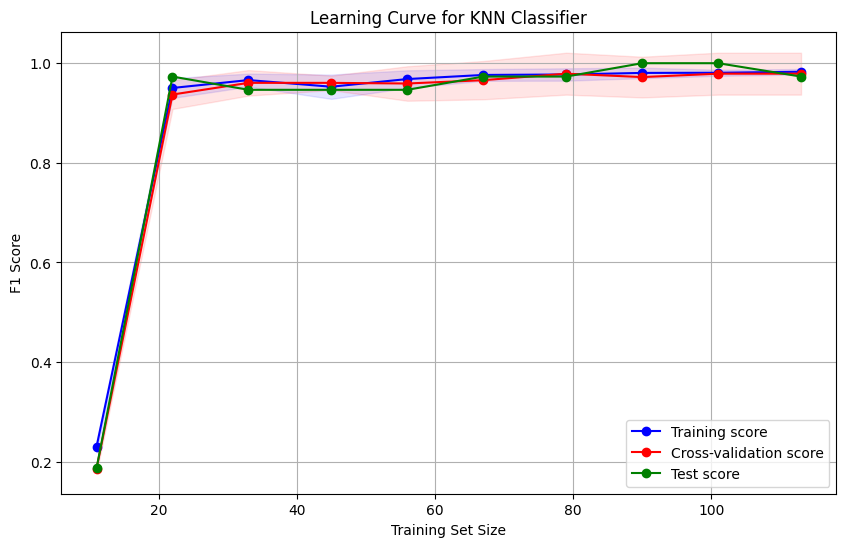

In [27]:
# Generate learning curves
train_sizes, train_scores, validation_scores = learning_curve(
    estimator=clf,
    X=X_train,
    y=y_train,
    cv=5,  # 5-fold cross-validation
    scoring='f1_macro',  # Use F1 score for multi-class classification
    train_sizes=np.linspace(0.1, 1.0, 10),  # Training sizes from 10% to 100%
    random_state=42
)

# Calculate the mean and standard deviation of the training and validation scores
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
validation_scores_mean = np.mean(validation_scores, axis=1)
validation_scores_std = np.std(validation_scores, axis=1)

# Calculate test set scores for each training size
test_scores = []

for train_size in train_sizes:
    # Train model on a subset of the training data
    clf.fit(X_train[:int(train_size)], y_train[:int(train_size)])

    # Predict on the test set
    y_test_pred = clf.predict(X_test)

    # Calculate F1 score and append it
    test_f1 = f1_score(y_test, y_test_pred, average='macro')
    test_scores.append(test_f1)

# Plot learning curves
plt.figure(figsize=(10, 6))

# Training curve
plt.plot(train_sizes, train_scores_mean, 'o-', color='blue', label='Training score')
plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1,
                 color='blue')

# Validation curve
plt.plot(train_sizes, validation_scores_mean, 'o-', color='red', label='Cross-validation score')
plt.fill_between(train_sizes, validation_scores_mean - validation_scores_std,
                 validation_scores_mean + validation_scores_std, alpha=0.1, color='red')

# Test curve
plt.plot(train_sizes, test_scores, 'o-', color='green', label='Test score')

plt.title('Learning Curve for KNN Classifier')
plt.xlabel('Training Set Size')
plt.ylabel('F1 Score')
plt.legend(loc='best')
plt.grid()
plt.show()